In [54]:
# importing the basic libraries
# the given problem is regression problem
import pandas as pd
import numpy as np
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [55]:
# splitting the dataset into training and test data
from sklearn.model_selection import train_test_split
train,test = train_test_split(glass,test_size = 0.2) 

In [56]:
# importing the required libraries and applying KNN algorithm on training data
from sklearn.neighbors import KNeighborsClassifier as KNC

In [63]:
# finding out the best k value
acc=[]
for i in range(3,50,2):
    neigh=KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
    train_acc=np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
    test_acc=np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
    acc.append([train_acc,test_acc])

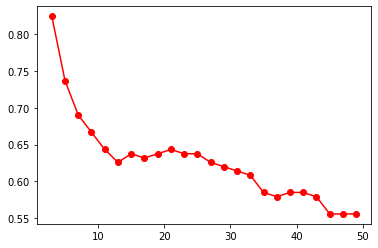

In [64]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

In [85]:
# building the model
# from the above plots it is very clear that number of neighbors to best considered is 25
neigh = KNC(n_neighbors=25)
neigh.fit(train.iloc[:,0:9],train.iloc[:,9])
train_acc = np.mean(neigh.predict(train.iloc[:,0:9])==train.iloc[:,9])
test_acc = np.mean(neigh.predict(test.iloc[:,0:9])==test.iloc[:,9])
test_acc

0.6744186046511628